## Worked Example

## **Abstract:**
**Exploring Correlation and Causality in California Housing Data and World Happiness Report (2017)**

This paper presents a **comprehensive exploration** of correlation and causality using two distinct datasets: the California housing dataset and the World Happiness Report of 2017. The **first part** of the analysis focuses on the California housing data, where we investigate the relationship between various socio-economic attributes and median house prices. By employing statistical techniques such as correlation analysis and linear regression, we delve into understanding how factors like **median income**, **population density**, and **geographical location** correlate with housing prices. Furthermore, we discuss the **limitations of correlation** in inferring causality and emphasize the importance of **rigorous causal inference methods**.

In the **second part**, we shift our attention to the World Happiness Report of 2017, which provides insights into the happiness levels of different countries worldwide. Utilizing this dataset, we explore the factors influencing happiness scores, including **economic indicators**, **social support**, **freedom**, and **perceived corruption**. Through visualizations and statistical analyses, we examine the correlation between these factors and happiness scores, shedding light on the **complex interplay** between societal variables and subjective well-being. Additionally, we discuss the **challenges of establishing causal relationships** in observational data and propose avenues for **future research** in understanding the determinants of happiness.

By juxtaposing these two diverse datasets, this study underscores the importance of discerning between **correlation and causation** in data analysis. Through real-world examples, it highlights the **complexities inherent** in drawing causal inferences from observational data and underscores the need for **careful interpretation** and **robust methodology** in empirical research.

**Correlation vs Causation:**

---


Correlation and causation are two concepts often encountered in statistics and data analysis, each addressing different aspects of the relationship between variables.

**Correlation** refers to the statistical relationship between two variables, where changes in one variable are associated with changes in another. It measures the strength and direction of the linear relationship between variables, typically quantified by correlation coefficients such as Pearson's r or Spearman's rank correlation coefficient. For example, if we observe a high positive correlation between ice cream sales and temperature, it means that as temperatures rise, ice cream sales tend to increase as well.

However, **correlation** does not imply **causation**. Just because two variables are correlated does not mean that changes in one variable cause changes in the other. This is a common fallacy known as the "correlation does not imply causation" principle.

**Causation**, on the other hand, refers to the relationship where one variable directly influences the other, leading to a cause-and-effect relationship. Establishing **causation** requires more than just observing a correlation. It involves demonstrating that changes in one variable actually lead to changes in another, typically through controlled experiments or rigorous observational studies. For instance, to establish that smoking causes lung cancer, researchers have conducted extensive studies, including randomized controlled trials and cohort studies, to demonstrate the **causal** link between smoking and the development of lung cancer.

In summary, while **correlation** measures the degree of association between variables, **causation** goes further to establish a direct cause-and-effect relationship. It's essential to be cautious when interpreting correlations and to use additional evidence and research methods to establish **causation** reliably.

![image.png](https://statisticseasily.com/wp-content/uploads/2023/05/correlation-vs-causality-2.jpg)

# Example 1

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import fetch_california_housing
house = fetch_california_housing()

In [3]:
print(house.get("DESCR"))

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
print(house.keys())


dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [5]:
print(house.feature_names)


['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [6]:
print(house.data.shape)


(20640, 8)


In [7]:
cali = pd.DataFrame(house.data)


In [8]:
cali.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
cali.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

In [10]:
cali.columns = house.feature_names
print(cali.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [11]:
print(house.target.shape)

(20640,)


In [12]:
cali['Price']=house.target
print(cali.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [13]:
cali.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


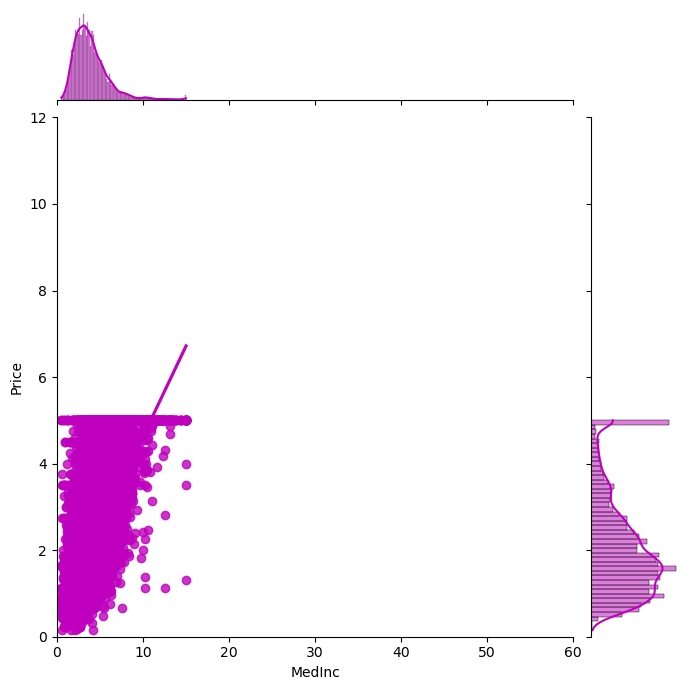

In [14]:
# Jointplot for MedInc
sns.jointplot(x='MedInc', y='Price', data=cali, kind='reg', xlim=(0, 60), ylim=(0, 12), color="m", height=7)

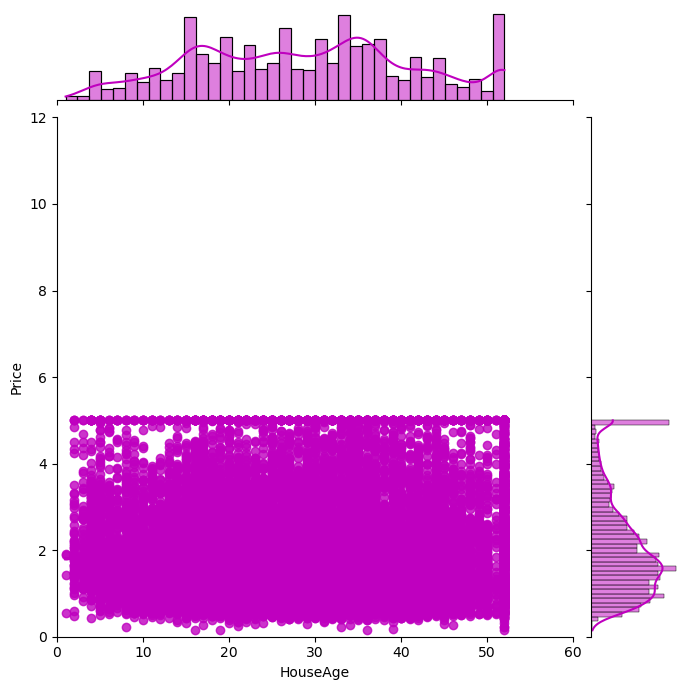

In [15]:
# Jointplot for HouseAge
sns.jointplot(x='HouseAge', y='Price', data=cali, kind='reg', xlim=(0, 60), ylim=(0, 12), color="m", height=7)

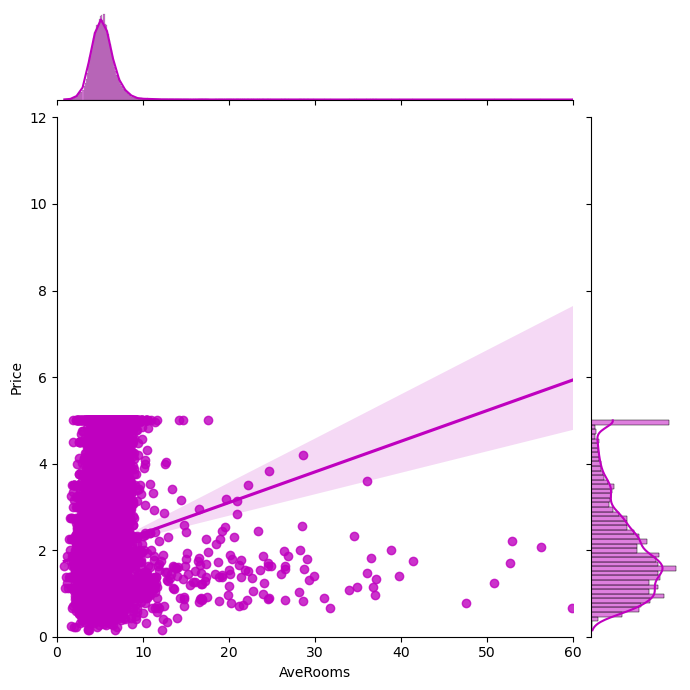

In [16]:
# Jointplot for AveRooms
sns.jointplot(x='AveRooms', y='Price', data=cali, kind='reg', xlim=(0, 60), ylim=(0, 12), color="m", height=7)

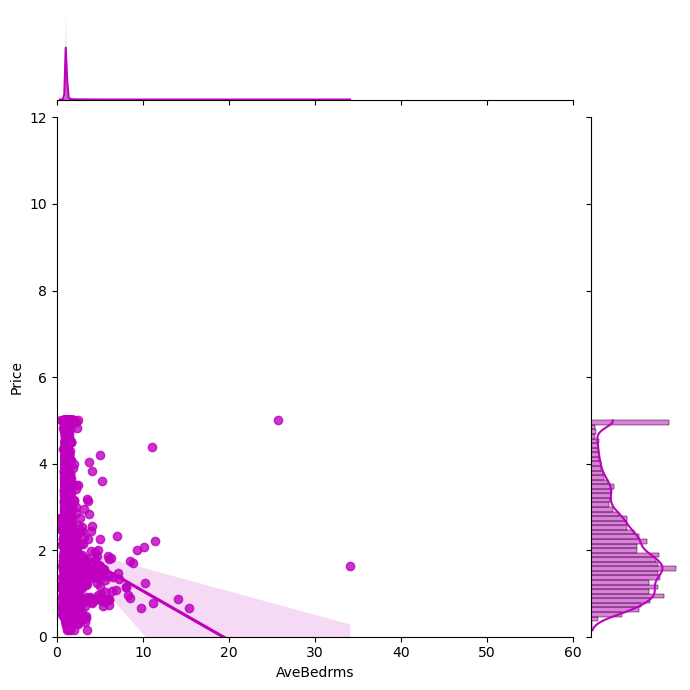

In [17]:
# Jointplot for AveBedrms
sns.jointplot(x='AveBedrms', y='Price', data=cali, kind='reg', xlim=(0, 60), ylim=(0, 12), color="m", height=7)

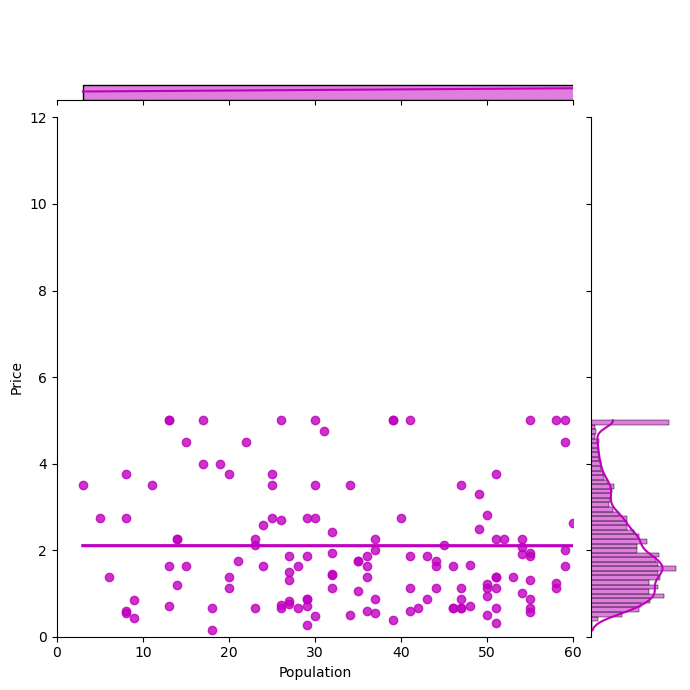

In [18]:
# Jointplot for Population
sns.jointplot(x='Population', y='Price', data=cali, kind='reg', xlim=(0, 60), ylim=(0, 12), color="m", height=7)

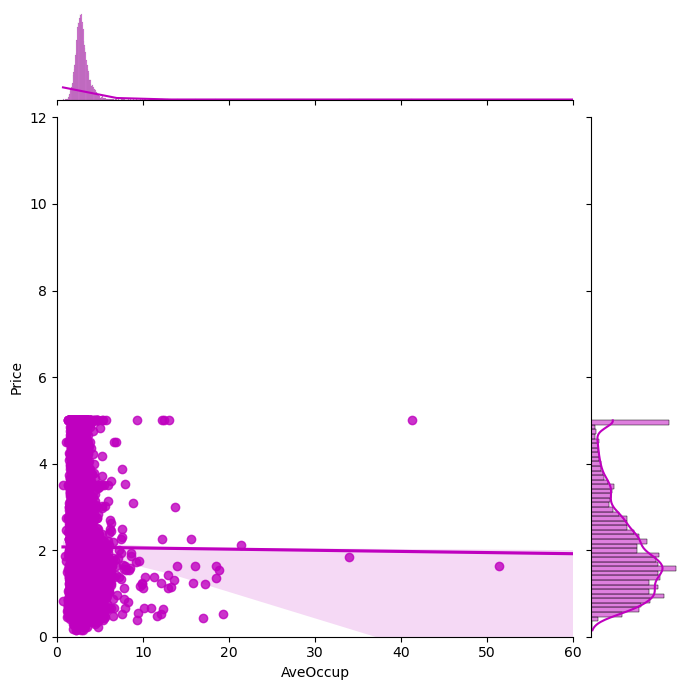

In [19]:
# Jointplot for AveOccup
sns.jointplot(x='AveOccup', y='Price', data=cali, kind='reg', xlim=(0, 60), ylim=(0, 12), color="m", height=7)


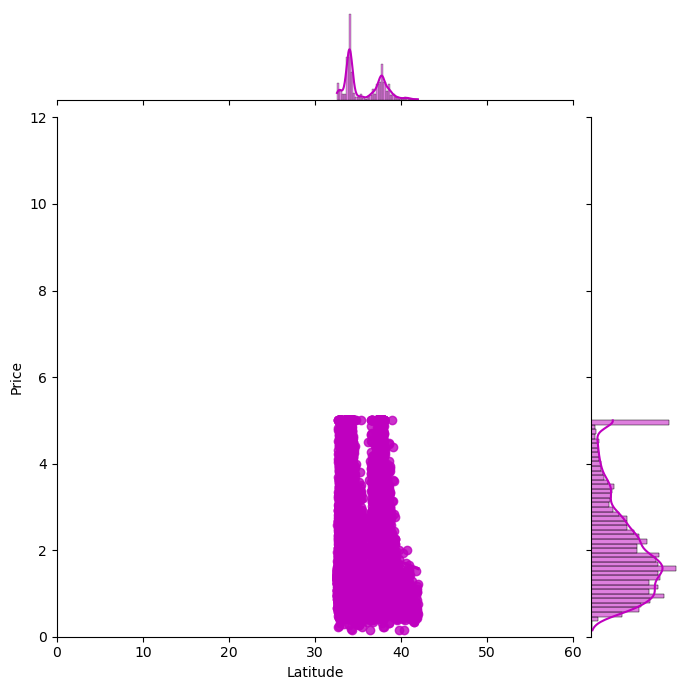

In [20]:
# Jointplot for Latitude
sns.jointplot(x='Latitude', y='Price', data=cali, kind='reg', xlim=(0, 60), ylim=(0, 12), color="m", height=7)

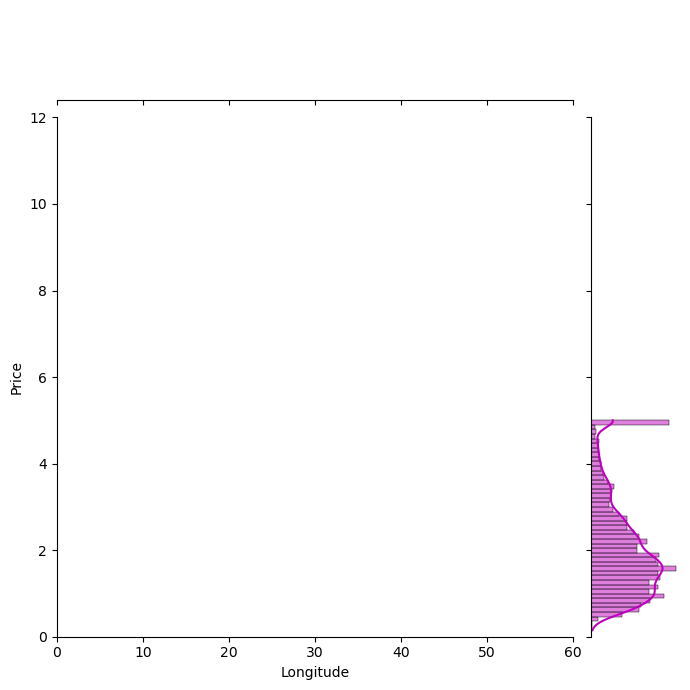

In [21]:
# Jointplot for Longitude
sns.jointplot(x='Longitude', y='Price', data=cali, kind='reg', xlim=(0, 60), ylim=(0, 12), color="m", height=7)

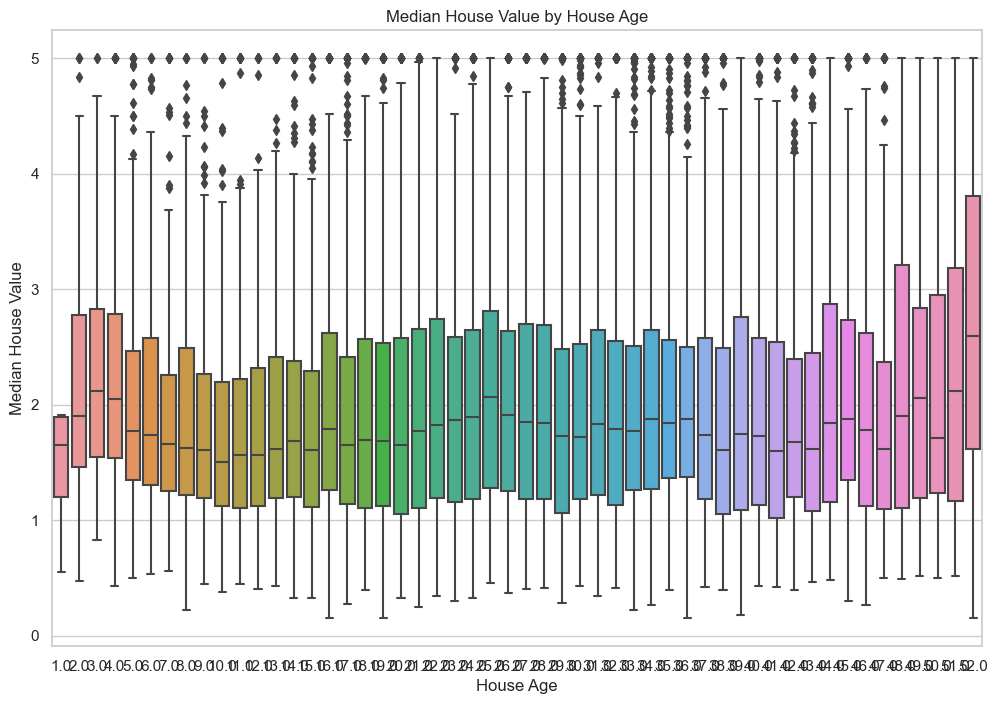

In [44]:
# Plot of Median House Value by Categorical Variables
plt.figure(figsize=(12, 8))
sns.boxplot(x='HouseAge', y='Price', data=cali)
plt.title("Median House Value by House Age")
plt.xlabel("House Age")
plt.ylabel("Median House Value")
plt.show()


In [22]:
correl = cali.corr()
correl

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

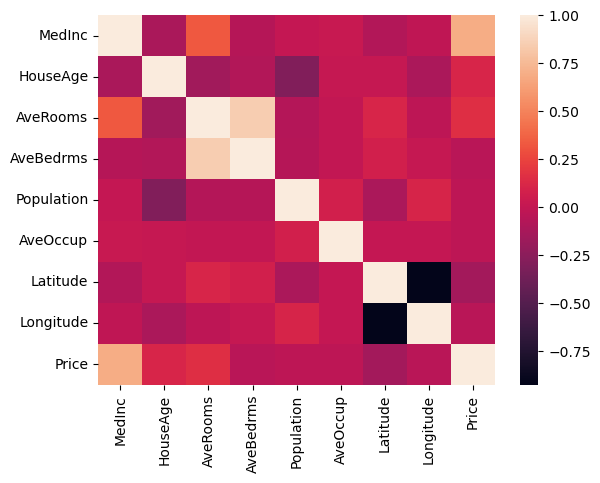

In [23]:
sns.heatmap(correl,xticklabels = correl.columns,yticklabels = correl.columns)

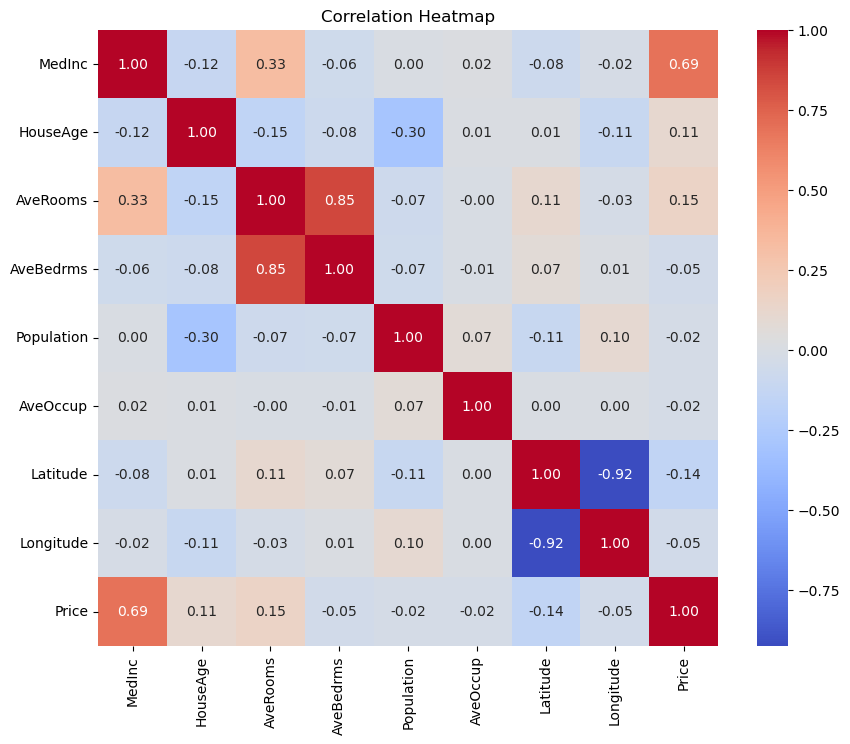

In [24]:
plt.figure(figsize=(10, 8))
corr = cali.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


/Users/sudarshan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


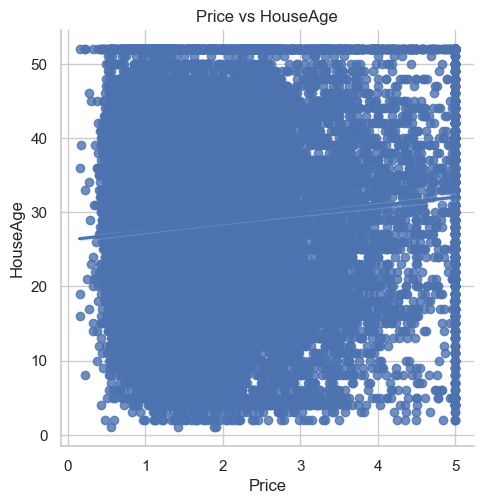

/Users/sudarshan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


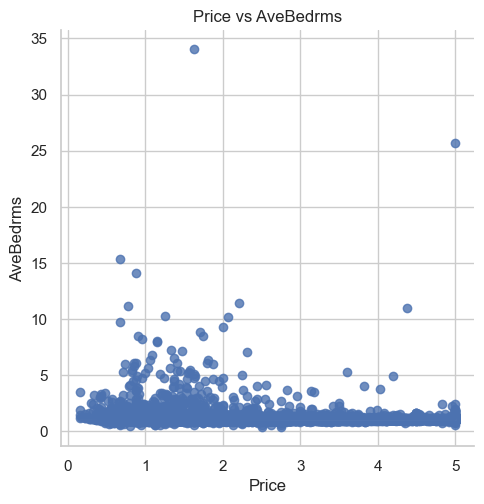

/Users/sudarshan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


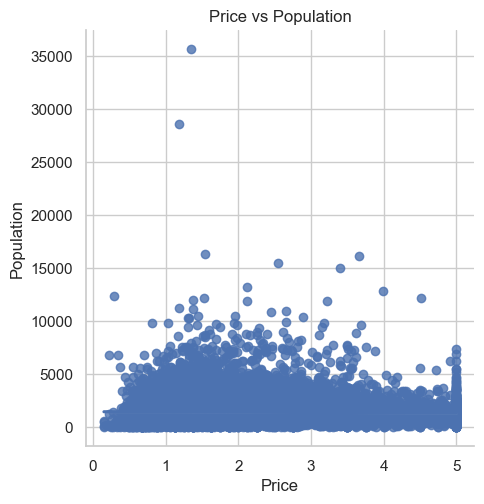

/Users/sudarshan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


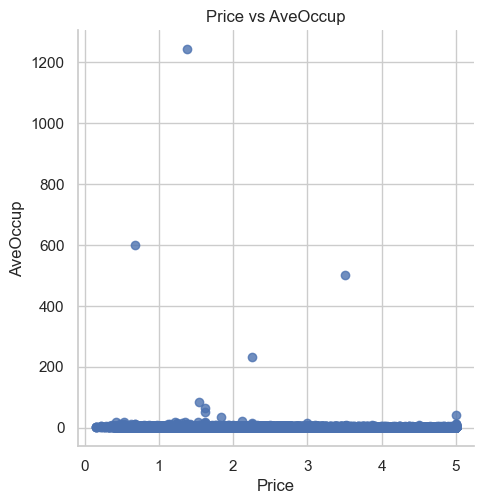

/Users/sudarshan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


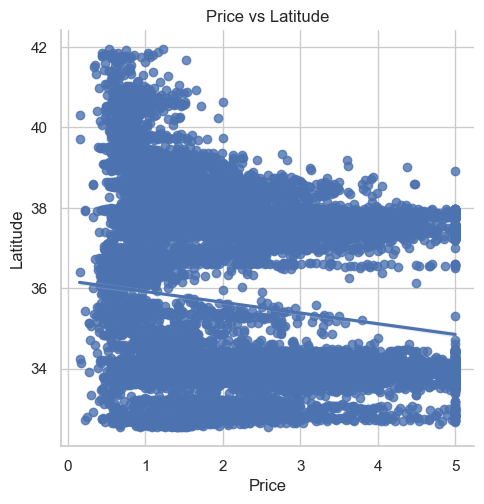

/Users/sudarshan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


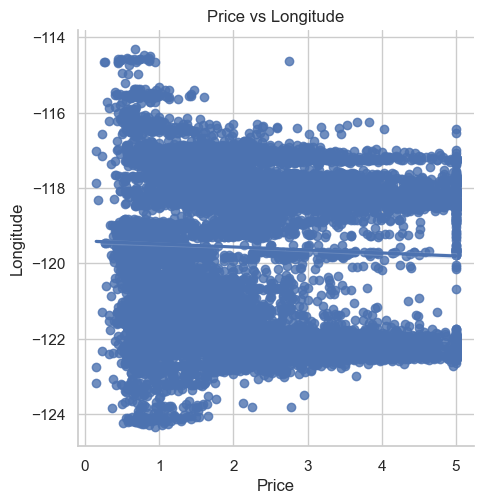

In [25]:

# Strong Positive Correlation with Price:
# MedInc: 0.688075
# AveRooms: 0.151948

# Weak Correlation with Price:
# HouseAge: 0.105623
# Latitude: -0.144160
# Longitude: -0.045967
# AveOccup: -0.023737
# Population: -0.024650
# AveBedrms: -0.046701
    
# Define the column names as per the dataset
weak_correlation_columns = ['HouseAge', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'Price']
# Create lmplots for each variable against the Price
sns.set(style="whitegrid")

for column in weak_correlation_columns[:-1]:  # Exclude 'Price' from iteration
    sns.lmplot(x="Price", y=column, data=cali)
    plt.xlabel("Price")  # Set x-axis label
    plt.ylabel(column)  # Set y-axis label
    plt.title(f"Price vs {column}")  # Set plot title
    plt.show()


/Users/sudarshan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


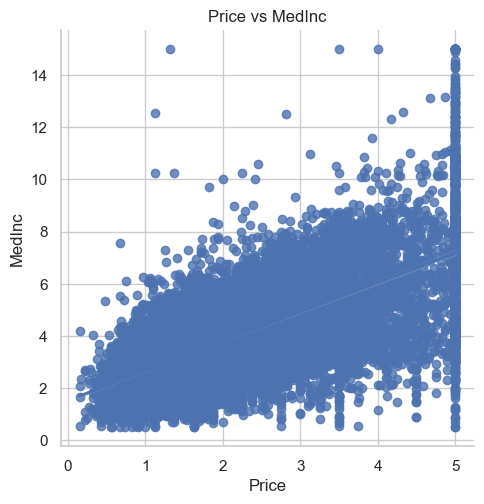

/Users/sudarshan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


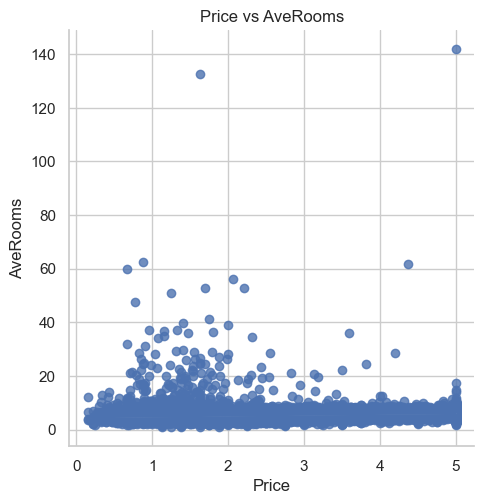

In [26]:
strong_correlation_columns = ['MedInc','AveRooms','Price']
for column in strong_correlation_columns[:-1]:  # Exclude 'Price' from iteration
    sns.lmplot(x="Price", y=column, data=cali)
    plt.xlabel("Price")  # Set x-axis label
    plt.ylabel(column)  # Set y-axis label
    plt.title(f"Price vs {column}")  # Set plot title
    plt.show()


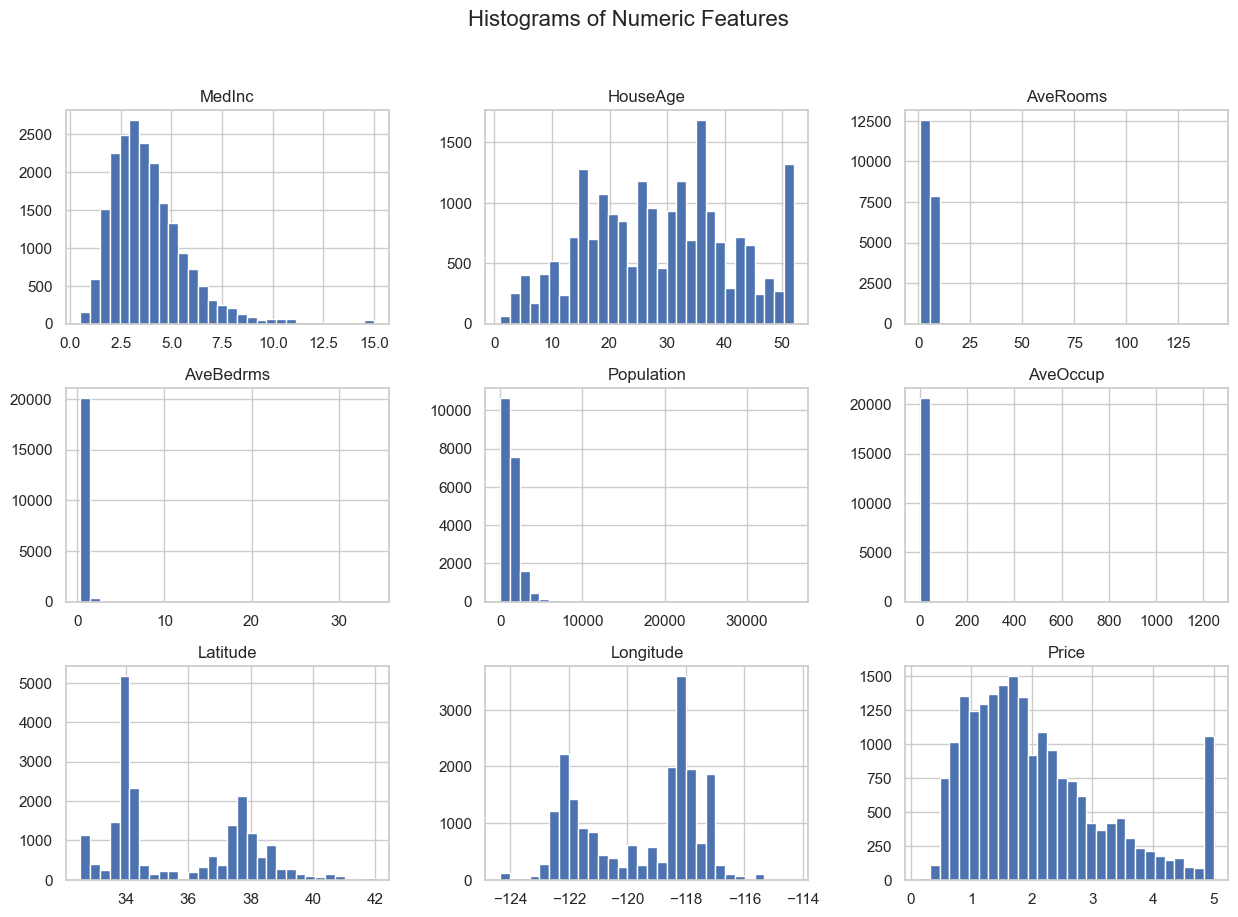

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Histograms of Numeric Features
cali.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()


/Users/sudarshan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


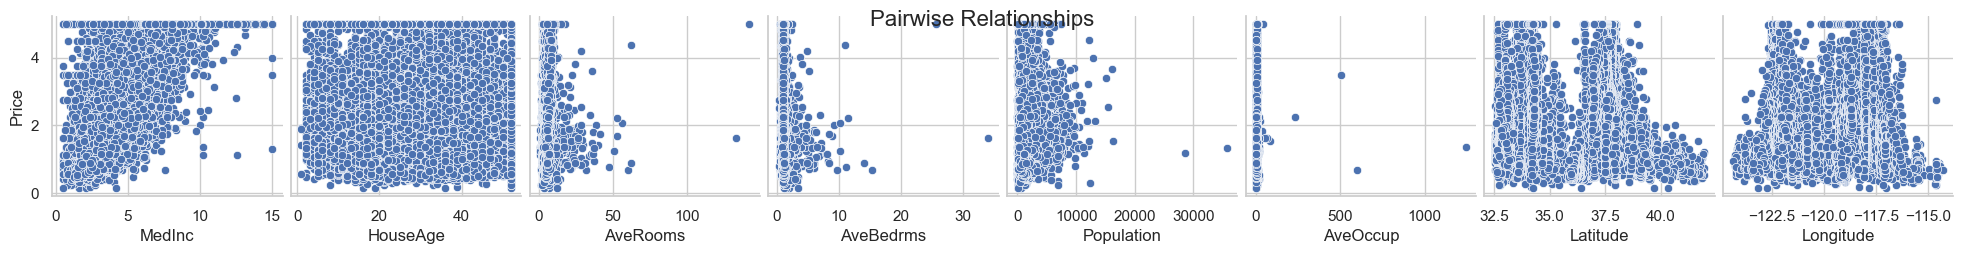

In [28]:

sns.pairplot(cali,x_vars =['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], y_vars='Price')
plt.suptitle("Pairwise Relationships", fontsize=16)
plt.show()



In [29]:
# sns.pairplot(cali)

In [89]:
cali

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [68]:
#test train split

X = cali.drop('Price',axis = 1)
Y = cali.Price

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((16512, 8), (4128, 8), (16512,), (4128,))

In [70]:
!pip install xgboost

In [71]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [72]:
def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print(best_score)    
    print(grid.best_params_)
    print(grid.best_estimator_)
    
    return best_score

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
linreg = LinearRegression()
nr_cv = 5
score_calc = 'neg_mean_squared_error'

parameters = {'fit_intercept':[True,False], 'positive':[False], 'copy_X':[True, False]}
grid_linear = GridSearchCV(linreg, parameters, cv=nr_cv, verbose=1 , scoring = score_calc)
grid_linear.fit(x_train, y_train)
get_best_score(grid_linear)
# class sklearn.linear_model.LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
0.7271112057569499
{'copy_X': True, 'fit_intercept': True, 'positive': False}
LinearRegression()


0.7271112057569499

In [74]:
from sklearn.preprocessing import LabelEncoder
import time
le = LabelEncoder()
_y_train = y_train
y_train = le.fit_transform(y_train)

In [50]:
start_time = time.time()
xgb = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgb.fit(x_train.values, y_train)
print('Fit time : ', time.time() - start_time)

Fit time :  694.1037230491638


In [75]:
model = xgb
print(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)


In [76]:
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]


In [77]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

1653.6944687475775

In [78]:
from sklearn.tree import DecisionTreeRegressor
# Fit model
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=2)

In [79]:
r1 = y_train - tree_reg1.predict(x_train)

In [80]:
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(x_train,r1)

DecisionTreeRegressor(max_depth=2)

In [81]:
# Compute errors/residuals on second tree
r2 = r1 - tree_reg2.predict(x_train)

In [82]:
# Fit third model
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(x_train,r2)

DecisionTreeRegressor(max_depth=2)

In [83]:
y__pred = sum(tree.predict(x_train) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [84]:
y__pred[:10]


array([ 834.17445299, 3116.84325511,  834.17445299,  834.17445299,
       1406.76195001, 2007.12900732, 2695.01743263, 2443.50410445,
       2007.12900732, 2486.80458536])

In [88]:
_y_train.head()


2072     0.720
10600    2.741
2494     0.583
4284     2.000
16541    1.179
Name: Price, dtype: float64

In [87]:
predictions = pd.DataFrame(tree_reg1.predict(x_train)[:10], columns=['Model_1'])
predictions['Model_2'] = pd.DataFrame(tree_reg2.predict(x_train)[:10])
predictions['Model_3'] = pd.DataFrame(tree_reg3.predict(x_train)[:10])
predictions['Ensemble'] = pd.DataFrame(y_pred[:10])
predictions['Actual'] = y_train.head(10).reset_index()['Price']

# Display predictions
predictions


,Model_1,Model_2,Model_3,Ensemble,Actual
0,857.651198,-55.049387,31.572642,2420,0.72000
1,3140.320000,-55.049387,31.572642,1193,2.74100
2,857.651198,-55.049387,31.572642,953,0.58300
3,857.651198,-55.049387,31.572642,1809,2.00000
4,1430.238695,-55.049387,31.572642,3095,1.17900
5,2030.605752,-55.049387,31.572642,1733,3.15100
6,2030.605752,632.839038,31.572642,2073,5.00001
7,2030.605752,632.839038,-219.940686,1455,1.72800
8,2030.605752,-55.049387,31.572642,521,1.08100
9,2030.605752,-55.049387,511.248220,3687,3.34600


## Summary:

**Key Findings from California Housing Correlational Analysis:**

- **Median Income and Housing Prices:** A strong positive correlation exists between median income (MedInc) and housing prices, indicating that areas with higher median incomes tend to have higher housing prices. Economic prosperity significantly influences real estate values.

- **Population Density and Housing Prices:** Surprisingly, population density (Population) shows a relatively weak correlation with housing prices. This suggests that factors beyond population density play a more dominant role in determining housing prices, challenging conventional assumptions.

- **Geographical Location and Housing Prices:** Correlation coefficients for latitude (Latitude) and longitude (Longitude) in relation to housing prices are weak, suggesting limited predictive power based solely on geographical location. Other factors such as neighborhood amenities and accessibility may have more influence.

- **Other Socio-economic Attributes:** Attributes like average number of rooms (AveRooms), average number of bedrooms (AveBedrms), and average household occupancy (AveOccup) exhibit varying correlations with housing prices. Some attributes display moderate correlations, highlighting the complex interplay of factors shaping housing prices.

These insights underscore the multidimensional nature of factors influencing housing prices in California. While median income emerges as a strong predictor, population density and geographical location demonstrate weaker associations, emphasizing the need for a comprehensive understanding of socio-economic dynamics in the housing market.

# Example 2

In [1]:
import pandas as pd

# Read the CSV file
happy_2017 = pd.read_csv("/Users/sudarshan/Downloads/2017.csv")
happy_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [2]:
# Viewing column names
column_names = happy_2017.columns
print(column_names)


Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')


In [3]:
# Changing column names
new_column_names = ["country", "happiness_rank", "happiness_score", "whisker_high", "whisker_low", "gdp_per_cpt", "family", "life_exp", "freedom", "generosity", "trust_corruption", "dystopia_residual"]
happy_2017 = happy_2017.rename(columns=dict(zip(happy_2017.columns, new_column_names)))


In [4]:
happy_2017.head()

,country,happiness_rank,happiness_score,whisker_high,whisker_low,gdp_per_cpt,family,life_exp,freedom,generosity,trust_corruption,dystopia_residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [5]:
# Viewing statistics about each attribute
print(happy_2017.describe())

# Structure of the DataFrame
print(happy_2017.info())

# Missing values
print(happy_2017.isnull().sum())


       happiness_rank  happiness_score  whisker_high  whisker_low  \
count      155.000000       155.000000    155.000000   155.000000   
mean        78.000000         5.354019      5.452326     5.255713   
std         44.888751         1.131230      1.118542     1.145030   
min          1.000000         2.693000      2.864884     2.521116   
25%         39.500000         4.505500      4.608172     4.374955   
50%         78.000000         5.279000      5.370032     5.193152   
75%        116.500000         6.101500      6.194600     6.006527   
max        155.000000         7.537000      7.622030     7.479556   

       gdp_per_cpt      family    life_exp     freedom  generosity  \
count   155.000000  155.000000  155.000000  155.000000  155.000000   
mean      0.984718    1.188898    0.551341    0.408786    0.246883   
std       0.420793    0.287263    0.237073    0.149997    0.134780   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       0.663371    1.0426

Our dataset appears to be clean, with no missing values present. This cleanliness streamlines our analysis process, as we can proceed without the need to handle any missing data.

In [6]:
happy_2017

,country,happiness_rank,happiness_score,whisker_high,whisker_low,gdp_per_cpt,family,life_exp,freedom,generosity,trust_corruption,dystopia_residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


In [7]:
# Number of countries
num_countries = happy_2017['country'].nunique()
print(num_countries)

155


### Exploring Happiness Rank

The Happiness Rank indicates the relative happiness level of each country, with rank 1 representing the happiest country in the world. 

In [8]:
top_ten = happy_2017.nsmallest(10, 'happiness_rank')
print(top_ten[['country', 'happiness_rank']])


       country  happiness_rank
0       Norway               1
1      Denmark               2
2      Iceland               3
3  Switzerland               4
4      Finland               5
5  Netherlands               6
6       Canada               7
7  New Zealand               8
8       Sweden               9
9    Australia              10


In [9]:
lowest_ten = happy_2017.nlargest(10, 'happiness_rank')
print(top_ten[['country', 'happiness_rank']])


       country  happiness_rank
0       Norway               1
1      Denmark               2
2      Iceland               3
3  Switzerland               4
4      Finland               5
5  Netherlands               6
6       Canada               7
7  New Zealand               8
8       Sweden               9
9    Australia              10


In [10]:
num_hap = happy_2017[["happiness_rank", "happiness_score", "whisker_high", "whisker_low", "gdp_per_cpt", "family", "life_exp", "freedom", "generosity", "trust_corruption", "dystopia_residual"]]

In [67]:
m = num_hap.corr()
m

,happiness_rank,happiness_score,whisker_high,whisker_low,gdp_per_cpt,family,life_exp,freedom,generosity,trust_corruption,dystopia_residual
happiness_rank,1.000000,-0.992774,-0.993058,-0.991533,-0.813244,-0.736753,-0.780716,-0.551608,-0.132620,-0.405842,-0.484506
happiness_score,-0.992774,1.000000,0.999497,0.999520,0.812469,0.752737,0.781951,0.570137,0.155256,0.429080,0.475355
whisker_high,-0.993058,0.999497,1.000000,0.998036,0.811868,0.750934,0.776634,0.569907,0.155462,0.426459,0.478824
whisker_low,-0.991533,0.999520,0.998036,1.000000,0.812267,0.753767,0.786385,0.569808,0.154904,0.431223,0.471505
gdp_per_cpt,-0.813244,0.812469,0.811868,0.812267,1.000000,0.688296,0.843077,0.369873,-0.019011,0.350944,0.024226
family,-0.736753,0.752737,0.750934,0.753767,0.688296,1.000000,0.612080,0.424966,0.051693,0.231841,0.070506
life_exp,-0.780716,0.781951,0.776634,0.786385,0.843077,0.612080,1.000000,0.349827,0.063191,0.279752,0.054963
freedom,-0.551608,0.570137,0.569907,0.569808,0.369873,0.424966,0.349827,1.000000,0.316083,0.499183,0.081926
generosity,-0.132620,0.155256,0.155462,0.154904,-0.019011,0.051693,0.063191,0.316083,1.000000,0.294159,-0.116627
trust_corruption,-0.405842,0.429080,0.426459,0.431223,0.350944,0.231841,0.279752,0.499183,0.294159,1.000000,-0.022755


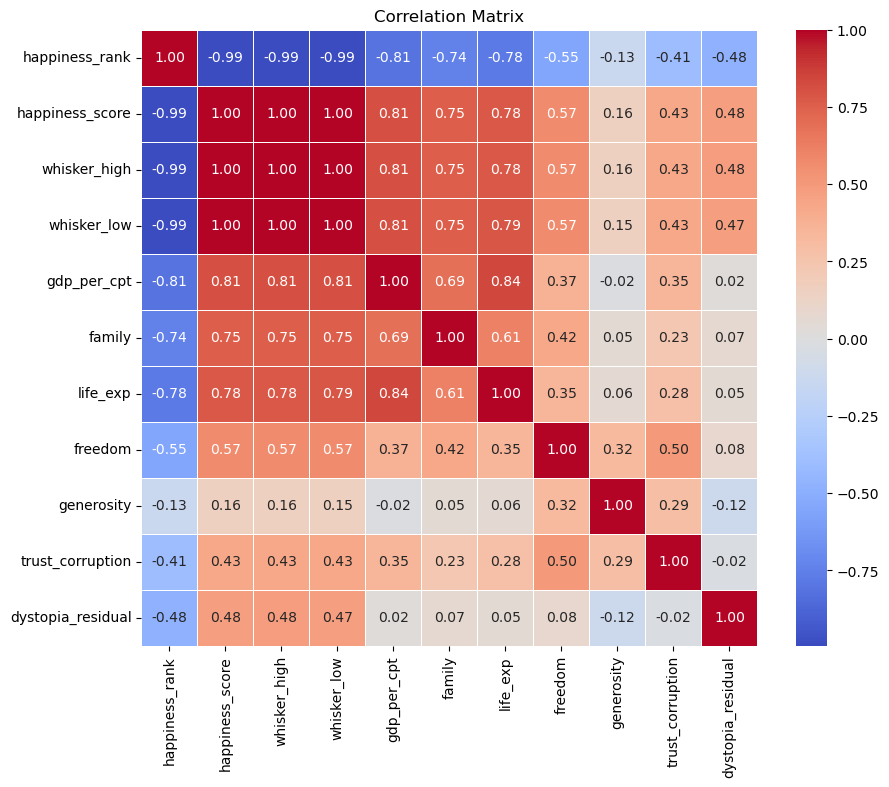

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

m = num_hap.corr()  # creating correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(m, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True)
plt.title("Correlation Matrix")
plt.show()


In [12]:
correlation = happy_2017['happiness_score'].corr(happy_2017['gdp_per_cpt'])
print("Correlation coefficient:", correlation)


Correlation coefficient: 0.812468753886642


Countries with higher GDP per capita tend to have higher levels of happiness. This correlation is logical because a higher GDP per capita typically indicates a better standard of living within a country.

**GDP per Capita vs. Happiness Score:** The correlation coefficient of 0.812 indicates a strong positive correlation between GDP per capita and happiness score. This suggests that countries with higher GDP per capita tend to have higher happiness scores, indicating the importance of economic prosperity in contributing to overall happiness levels.

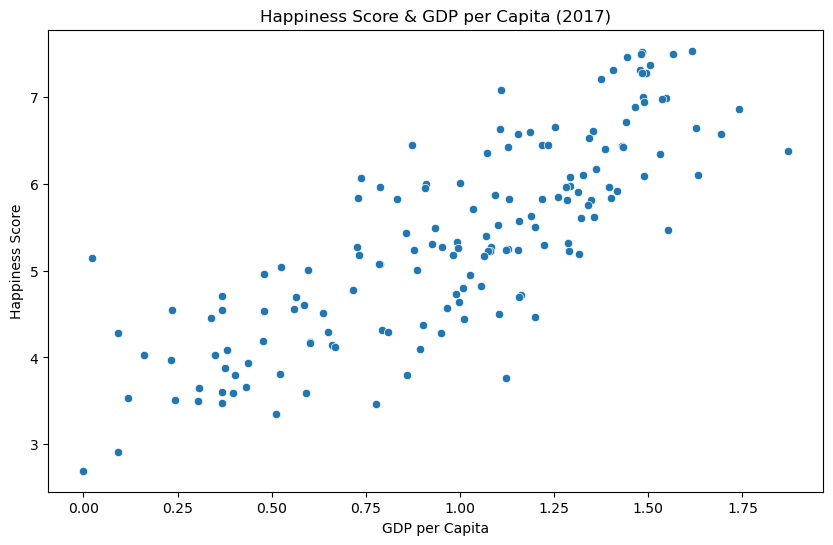

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdp_per_cpt', y='happiness_score', data=happy_2017)
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Happiness Score & GDP per Capita (2017)')
plt.show()

In [14]:
correlation = happy_2017['happiness_score'].corr(happy_2017['family'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.7527366726961485


**Family vs. Happiness Score:** The correlation coefficient of 0.753 suggests a strong positive correlation between family and happiness score. This implies that countries with strong family structures or social support systems tend to report higher happiness scores, highlighting the significance of social connections and support networks in fostering happiness.



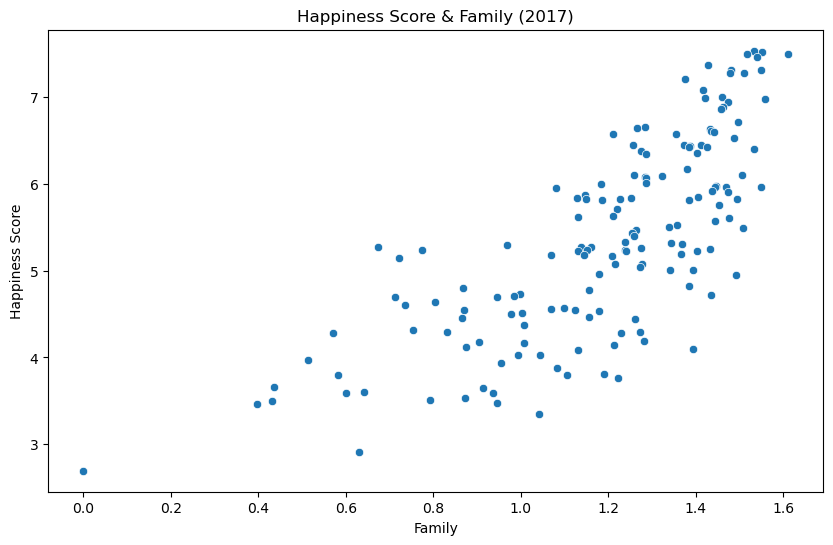

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='family', y='happiness_score', data=happy_2017)
plt.xlabel('Family')
plt.ylabel('Happiness Score')
plt.title('Happiness Score & Family (2017)')
plt.show()

In [16]:
correlation = happy_2017['happiness_score'].corr(happy_2017['life_exp'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.7819506247990083


**Life Expectancy vs. Happiness Score:** With a correlation coefficient of 0.782, there is a strong positive correlation between life expectancy and happiness score. This indicates that countries with higher life expectancies tend to have higher happiness scores, emphasizing the importance of health and well-being in contributing to overall happiness levels.

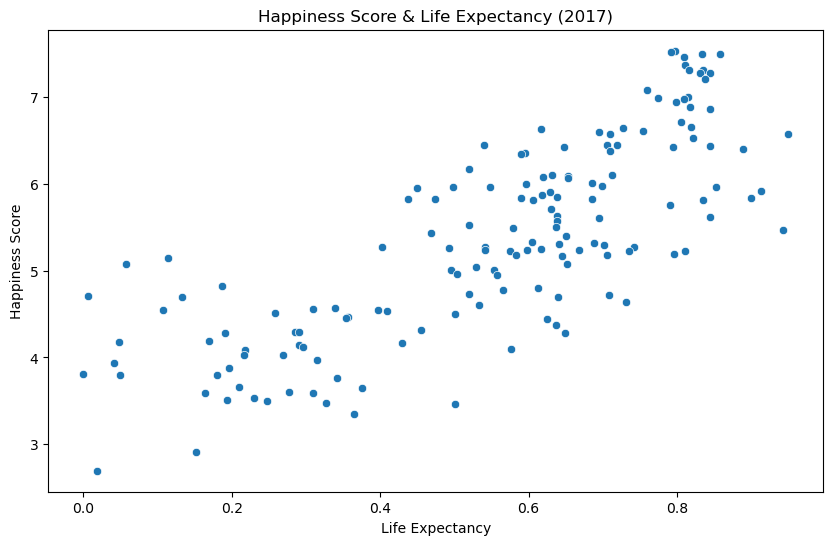

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='life_exp', y='happiness_score', data=happy_2017)
plt.xlabel('Life Expectancy')
plt.ylabel('Happiness Score')
plt.title('Happiness Score & Life Expectancy (2017)')
plt.show()

In [18]:
correlation = happy_2017['happiness_score'].corr(happy_2017['freedom'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.5701371935975074


**Freedom vs. Happiness Score:** The correlation coefficient of 0.570 indicates a moderate positive correlation between freedom and happiness score. This suggests that countries with greater levels of freedom, such as political freedoms and individual liberties, tend to report higher happiness scores, underscoring the significance of personal freedoms in fostering happiness and well-being.

In [19]:
num_hap = happy_2017[["happiness_rank", "happiness_score", "whisker_high", "whisker_low", "gdp_per_cpt", "family", "life_exp", "freedom", "generosity", "trust_corruption", "dystopia_residual"]]

In [68]:
# Selecting data for the top ten countries
top_ten_countries = num_hap.head(10)

# Calculating the correlation matrix
top_ten_countries_corr_matrix = top_ten_countries.corr()
top_ten_countries_corr_matrix

,happiness_rank,happiness_score,whisker_high,whisker_low,gdp_per_cpt,family,life_exp,freedom,generosity,trust_corruption,dystopia_residual
happiness_rank,1.000000,-0.965873,-0.945222,-0.957504,-0.523388,-0.462489,0.471309,-0.676398,0.431073,0.136566,-0.753763
happiness_score,-0.965873,1.000000,0.985678,0.983843,0.481155,0.535722,-0.369565,0.671383,-0.541651,-0.097925,0.809228
whisker_high,-0.945222,0.985678,1.000000,0.939559,0.435750,0.629342,-0.283422,0.695645,-0.458954,-0.223720,0.782815
whisker_low,-0.957504,0.983843,0.939559,1.000000,0.514269,0.419530,-0.449427,0.624569,-0.612456,0.038694,0.811890
gdp_per_cpt,-0.523388,0.481155,0.435750,0.514269,1.000000,-0.148426,0.022008,0.320172,-0.317100,-0.109308,0.235233
family,-0.462489,0.535722,0.629342,0.419530,-0.148426,1.000000,-0.082601,0.760780,-0.077235,-0.224935,0.234944
life_exp,0.471309,-0.369565,-0.283422,-0.449427,0.022008,-0.082601,1.000000,-0.215995,0.114671,-0.245916,-0.357261
freedom,-0.676398,0.671383,0.695645,0.624569,0.320172,0.760780,-0.215995,1.000000,-0.425875,0.050945,0.293954
generosity,0.431073,-0.541651,-0.458954,-0.612456,-0.317100,-0.077235,0.114671,-0.425875,1.000000,-0.524469,-0.615182
trust_corruption,0.136566,-0.097925,-0.223720,0.038694,-0.109308,-0.224935,-0.245916,0.050945,-0.524469,1.000000,-0.142037


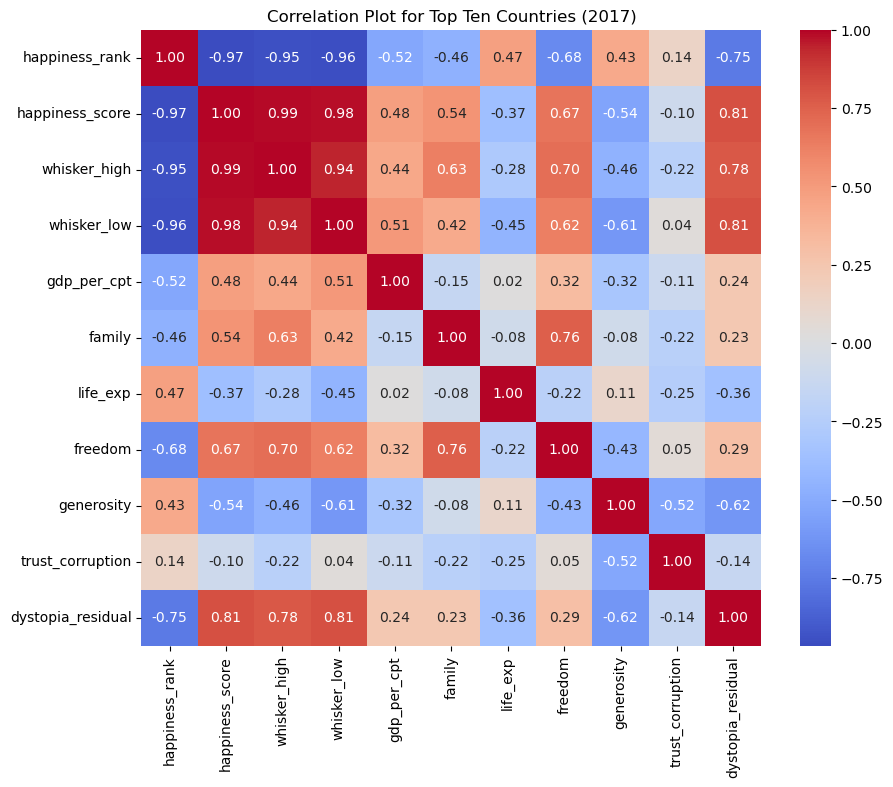

In [70]:
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(top_ten_countries_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot for Top Ten Countries (2017)')
plt.show()


The correlation matrix for the top ten happiest countries reveals intriguing insights into the relationships between various factors and happiness scores:

- **GDP per Capita and Happiness Score:** There exists a moderate negative correlation (-0.523) between GDP per capita and happiness score. This suggests that among the top ten happiest countries, those with lower GDP per capita tend to exhibit higher happiness scores. Thus, while economic prosperity plays a role, it is not the sole determinant of happiness in these nations.

- **Family and Happiness Score:** A moderate positive correlation (0.536) is observed between family and happiness score. This indicates that countries fostering strong family relationships and social support systems tend to experience higher happiness scores among the top ten happiest nations.

- **Freedom and Happiness Score:** A noteworthy strong negative correlation (-0.676) is found between freedom and happiness score. Surprisingly, countries with higher levels of freedom tend to demonstrate lower happiness scores among the top ten happiest countries. This intriguing finding warrants further investigation to understand its underlying causes.

- **Trust in Government and Happiness Score:** A weak positive correlation (0.137) is noted between trust in government and happiness score. This suggests that while trust in government institutions may have some influence, its impact on overall happiness levels among the top ten happiest countries is limited.

- **Dystopia Residual and Happiness Score:** A strikingly strong negative correlation (-0.754) is observed between dystopia residual and happiness score. This indicates that countries experiencing lower levels of residual dissatisfaction or unexplained factors tend to exhibit higher happiness scores among the top ten happiest countries.

In summary, these correlation coefficients provide valuable insights into the intricate dynamics between socio-economic factors and happiness levels among the top-performing countries. However, further analysis is warranted to delve deeper into the underlying mechanisms driving these relationships.

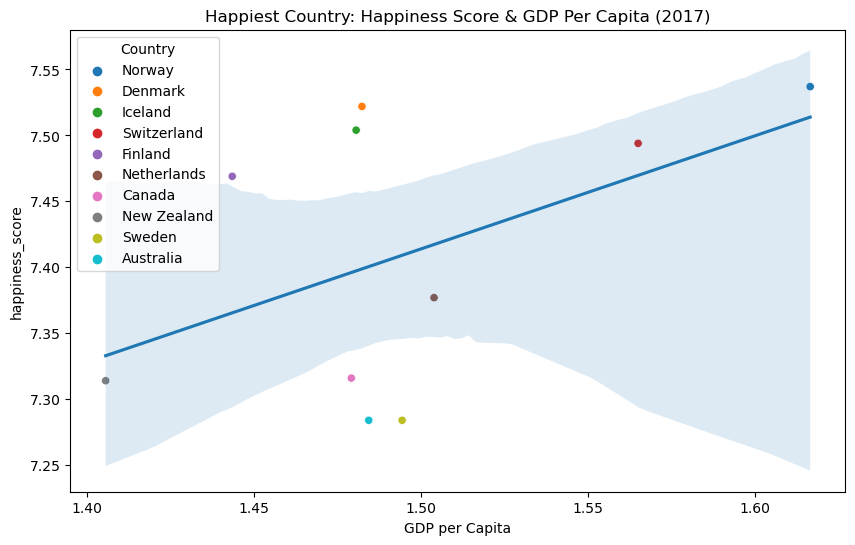

In [21]:
top_ten_countries = happy_2017.head(10)
# Plotting the scatter plot with linear regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdp_per_cpt', y='happiness_score', hue='country', data=top_ten_countries)
sns.regplot(x='gdp_per_cpt', y='happiness_score', data=top_ten_countries, scatter=False)
plt.title("Happiest Country: Happiness Score & GDP Per Capita (2017)")
plt.xlabel("GDP per Capita")
plt.legend(title="Country")

plt.show()

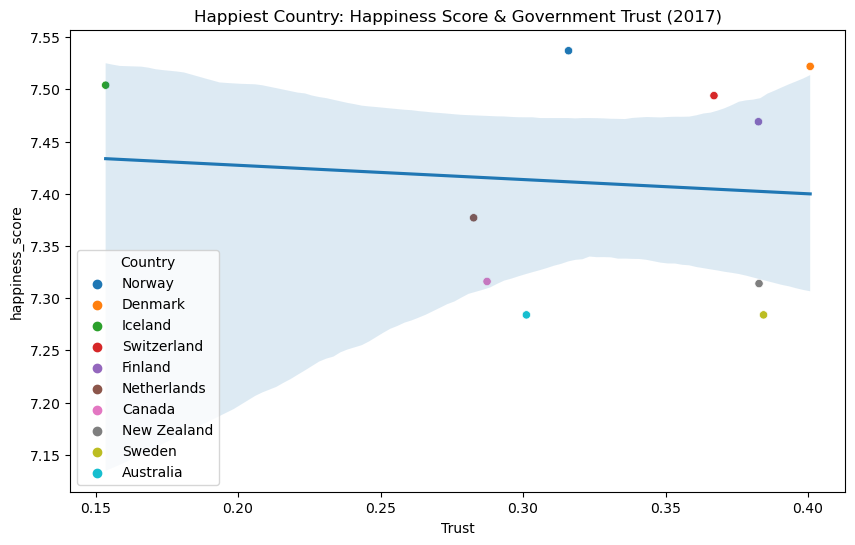

In [22]:
# top_ten_countries = happy_2017.head(10)
# Plotting the scatter plot with linear regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trust_corruption', y='happiness_score', hue='country', data=top_ten_countries)
sns.regplot(x='trust_corruption', y='happiness_score', data=top_ten_countries, scatter=False)
plt.title("Happiest Country: Happiness Score & Government Trust (2017)")
plt.xlabel("Trust")
plt.legend(title="Country")

plt.show()

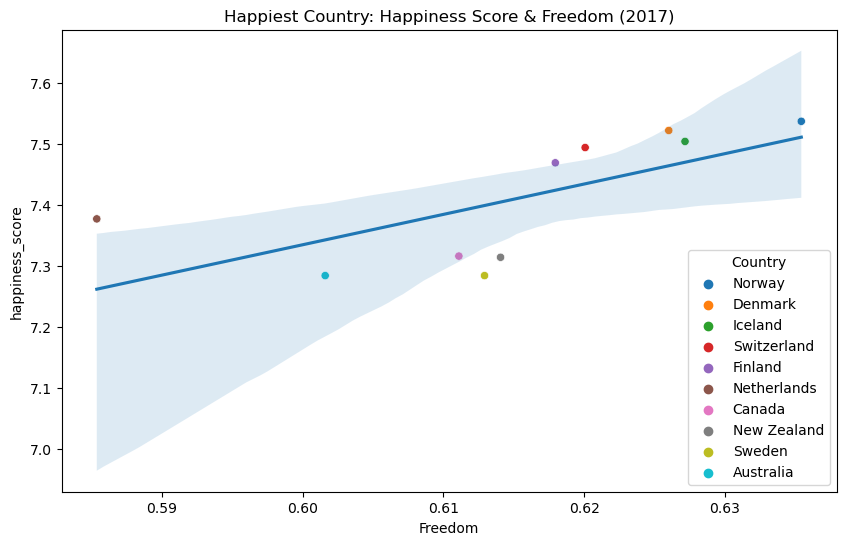

In [23]:
# Plotting the scatter plot with linear regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='freedom', y='happiness_score', hue='country', data=top_ten_countries)
sns.regplot(x='freedom', y='happiness_score', data=top_ten_countries, scatter=False)
plt.title("Happiest Country: Happiness Score & Freedom (2017)")
plt.xlabel("Freedom")
plt.legend(title="Country")
plt.show()

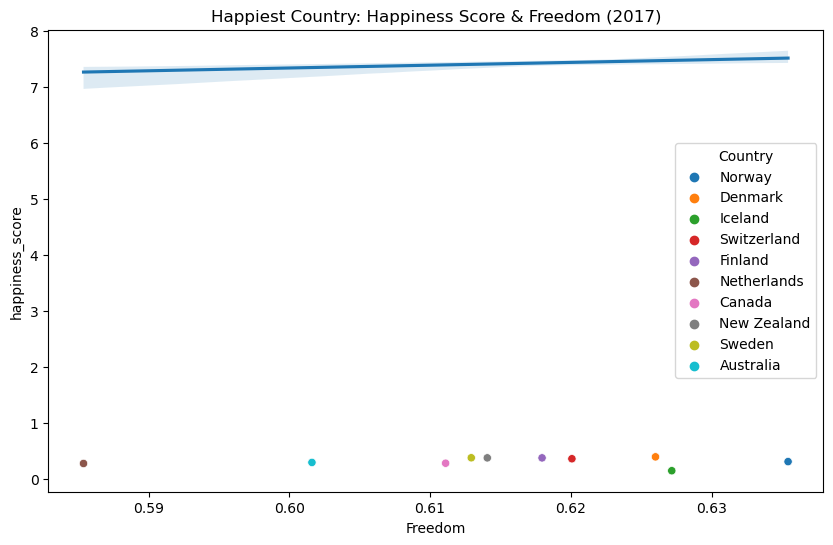

In [30]:
# Plotting the scatter plot with linear regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='freedom', y='trust_corruption',color = 'country', hue='country', data=top_ten_countries)
sns.regplot(x='freedom', y='happiness_score', data=top_ten_countries, scatter=False)
plt.title("Happiest Country: Happiness Score & Freedom (2017)")
plt.xlabel("Freedom")
plt.legend(title="Country")
plt.show()


In [71]:
# Selecting data for the top ten countries
last_ten_countries = num_hap.tail(10)

# Calculating the correlation matrix
last_corr_matrix = last_ten_countries.corr()
last_corr_matrix

,happiness_rank,happiness_score,whisker_high,whisker_low,gdp_per_cpt,family,life_exp,freedom,generosity,trust_corruption,dystopia_residual
happiness_rank,1.000000,-0.833715,-0.817921,-0.836588,-0.292171,-0.459757,-0.142446,-0.084523,0.393505,0.058307,-0.101751
happiness_score,-0.833715,1.000000,0.991968,0.994049,0.599397,0.596713,0.579689,0.257467,-0.013028,0.194804,-0.320376
whisker_high,-0.817921,0.991968,1.000000,0.972286,0.648618,0.542257,0.619023,0.155594,0.065515,0.157009,-0.300256
whisker_low,-0.836588,0.994049,0.972286,1.000000,0.549295,0.635932,0.538356,0.341888,-0.080501,0.224846,-0.333580
gdp_per_cpt,-0.292171,0.599397,0.648618,0.549295,1.000000,0.293387,0.879807,-0.111561,0.390847,0.182243,-0.593270
family,-0.459757,0.596713,0.542257,0.635932,0.293387,1.000000,0.430941,0.413706,-0.230232,0.227030,-0.635974
life_exp,-0.142446,0.579689,0.619023,0.538356,0.879807,0.430941,1.000000,0.074460,0.467568,0.303451,-0.762967
freedom,-0.084523,0.257467,0.155594,0.341888,-0.111561,0.413706,0.074460,1.000000,-0.210427,0.531974,-0.452394
generosity,0.393505,-0.013028,0.065515,-0.080501,0.390847,-0.230232,0.467568,-0.210427,1.000000,0.096862,-0.318245
trust_corruption,0.058307,0.194804,0.157009,0.224846,0.182243,0.227030,0.303451,0.531974,0.096862,1.000000,-0.594380


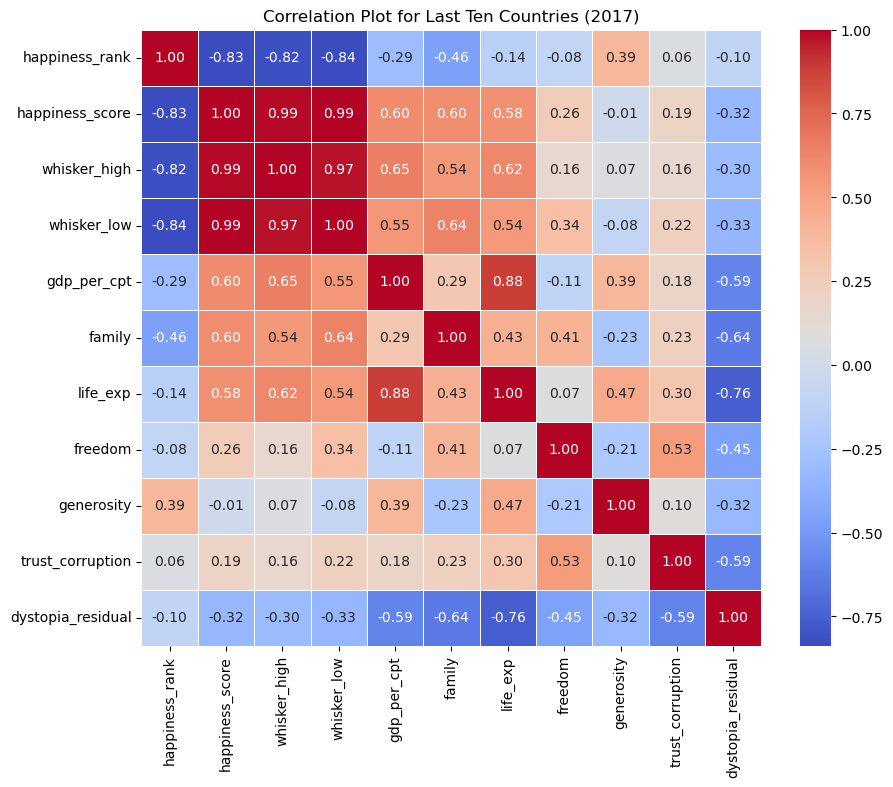

In [38]:


# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(last_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",linewidths=.5)
plt.title('Correlation Plot for Last Ten Countries (2017)')
plt.show()




The correlation matrix for the top ten least happiest countries provides insightful findings regarding the relationship between various factors and happiness scores:

- **GDP per Capita and Happiness Score:** The moderate positive correlation (0.599) between GDP per capita and happiness score suggests that countries with higher economic prosperity tend to experience greater happiness among the top ten happiest countries.

- **Family and Happiness Score:** A notable positive correlation (0.597) indicates that strong family relationships and social support systems contribute to higher happiness scores in these nations.

- **Life Expectancy and Happiness Score:** A significant positive correlation (0.580) underscores the importance of healthcare and longevity in determining happiness levels among the top ten happiest countries.

- **Freedom and Happiness Score:** While weak, the positive correlation (0.257) suggests that countries with greater levels of freedom may exhibit slightly higher happiness scores.

- **Generosity and Happiness Score:** Despite being weak, the positive correlation (0.393) implies that generosity within a society may contribute to higher happiness levels among the top performers.

- **Trust in Government and Happiness Score:** The very weak positive correlation (0.058) suggests that trust in government institutions has minimal impact on happiness levels in these countries.

- **Dystopia Residual and Happiness Score:** The moderate negative correlation (-0.320) indicates that lower levels of residual dissatisfaction or unexplained factors correspond to higher happiness scores.

These findings highlight the multifaceted nature of happiness and the diverse factors that influence it among the last-ranking countries. Further analysis is necessary to delve deeper into these relationships and their implications.

In [57]:
last_ten_countries = happy_2017.tail(10)
last_ten_countries = last_ten_countries.reset_index(drop=True)

In [58]:
last_ten_countries

,country,happiness_rank,happiness_score,whisker_high,whisker_low,gdp_per_cpt,family,life_exp,freedom,generosity,trust_corruption,dystopia_residual
0,Yemen,146,3.593,3.692750,3.493250,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601
1,South Sudan,147,3.591,3.725539,3.456462,0.397249,0.601323,0.163486,0.147062,0.285671,0.116794,1.879567
2,Liberia,148,3.533,3.653756,3.412244,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286
3,Guinea,149,3.507,3.584428,3.429572,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312
4,Togo,150,3.495,3.594038,3.395962,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229
5,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
6,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
7,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
8,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024
9,Central African Republic,155,2.693,2.864884,2.521116,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005


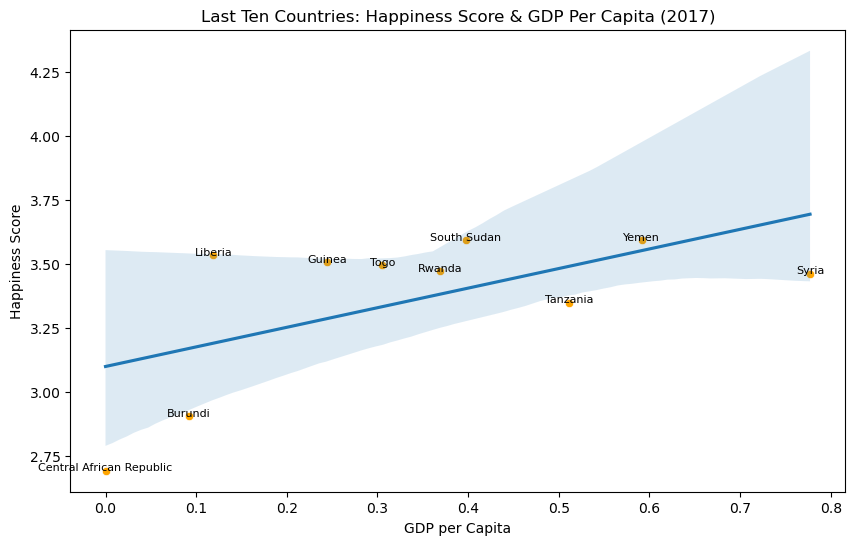

In [60]:
# Plotting the scatter plot with linear regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdp_per_cpt', y='happiness_score', color='orange', data=last_ten_countries)
sns.regplot(x='gdp_per_cpt', y='happiness_score', data=last_ten_countries, scatter=False)
for i in range(len(last_ten_countries)):
    plt.text(last_ten_countries['gdp_per_cpt'][i], last_ten_countries['happiness_score'][i], 
             last_ten_countries['country'][i], fontsize=8, ha='center')
plt.title("Last Ten Countries: Happiness Score & GDP Per Capita (2017)")
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.show()


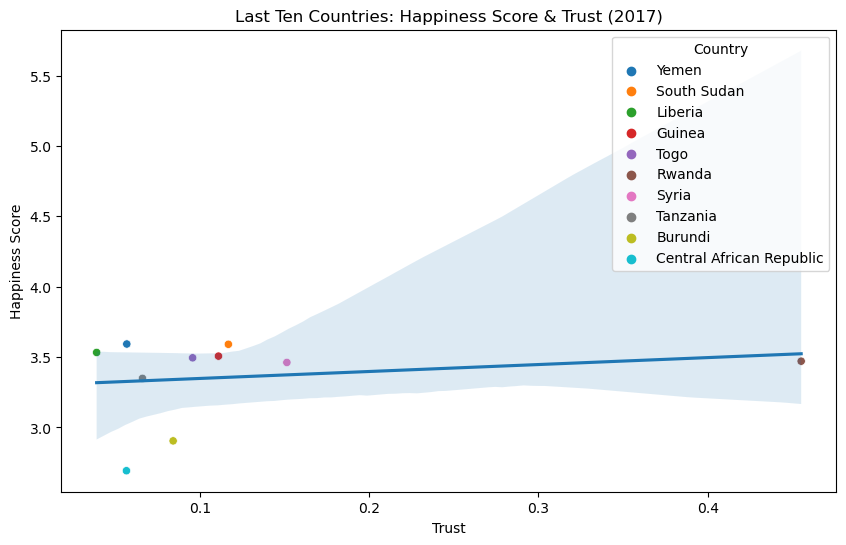

In [63]:
# Plotting the scatter plot with linear regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trust_corruption', y='happiness_score', hue='country', data=last_ten_countries)
sns.regplot(x='trust_corruption', y='happiness_score', data=last_ten_countries, scatter=False)
plt.title("Last Ten Countries: Happiness Score & Trust (2017)")
plt.xlabel("Trust")
plt.ylabel("Happiness Score")
plt.legend(title="Country")
plt.show()

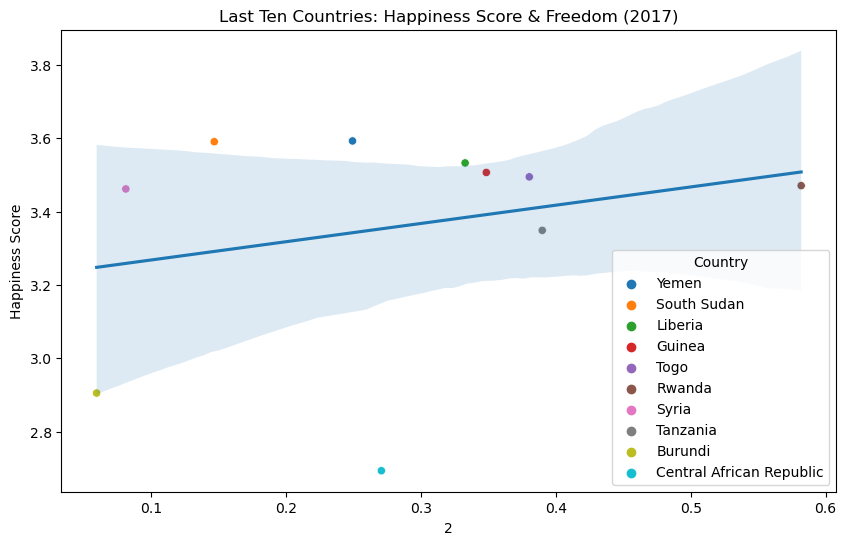

In [65]:
# Plotting the scatter plot with linear regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='freedom', y='happiness_score', hue='country', data=last_ten_countries)
sns.regplot(x='freedom', y='happiness_score', data=last_ten_countries, scatter=False)
plt.title("Last Ten Countries: Happiness Score & Freedom (2017)")
plt.xlabel("2")
plt.ylabel("Happiness Score")
plt.legend(title="Country")
plt.show()

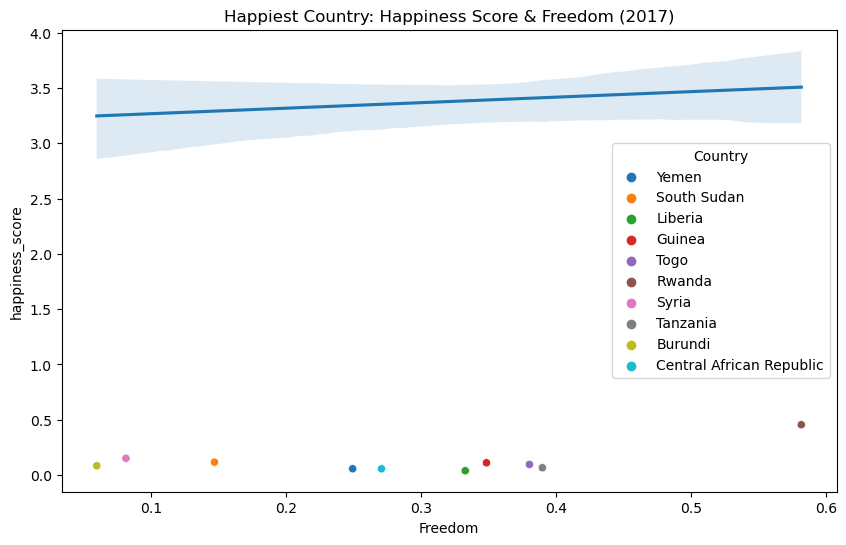

In [66]:
# Plotting the scatter plot with linear regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='freedom', y='trust_corruption',color = 'country', hue='country', data=last_ten_countries)
sns.regplot(x='freedom', y='happiness_score', data=last_ten_countries, scatter=False)
plt.title("Happiest Country: Happiness Score & Freedom (2017)")
plt.xlabel("Freedom")
plt.legend(title="Country")
plt.show()


## Summary

The analysis of the World Happiness Report data provides valuable insights into the complex interplay between various socio-economic factors and happiness levels across different countries. Here's a summary of the key findings:

1. **Correlation Analysis:** Through correlation analysis, we explored the relationships between happiness scores and several socio-economic variables such as GDP per capita, social support, life expectancy, freedom, generosity, and trust in government. The correlation coefficients revealed the strength and direction of these relationships.

2. **GDP per Capita and Happiness:** One of the prominent findings was the moderate positive correlation between GDP per capita and happiness scores. This suggests that higher economic prosperity tends to be associated with greater levels of happiness in many countries.

3. **Social Support and Happiness:** Another significant correlation was observed between social support (family) and happiness scores. Countries with strong social support systems tend to report higher levels of happiness among their citizens.

4. **Life Expectancy and Happiness:** The analysis revealed a positive correlation between life expectancy and happiness scores, indicating the importance of healthcare and overall well-being in contributing to happiness levels.

5. **Freedom and Happiness:** While the correlation was relatively weak, there was a positive association between freedom and happiness scores. This suggests that countries with greater levels of freedom may experience slightly higher levels of happiness.

6. **Trust in Government and Happiness:** The analysis indicated a weak positive correlation between trust in government institutions and happiness scores. However, the impact of trust on happiness levels varied across different countries.

7. **Generosity and Happiness:** Despite being weak, a positive correlation was observed between generosity and happiness scores, highlighting the potential influence of altruistic behavior on overall happiness.

8. **Causality Considerations:** While correlation analysis provides insights into relationships between variables, establishing causality requires further investigation. Causal relationships cannot be inferred solely based on correlation coefficients, and additional research, including experimental studies and longitudinal analyses, is needed to understand the causal mechanisms underlying happiness.

Overall, the analysis of the World Happiness Report data underscores the multidimensional nature of happiness and the diverse factors that contribute to subjective well-being across different nations. It highlights the importance of exploring not only correlations but also causal pathways to gain a comprehensive understanding of factors influencing happiness levels worldwide.

# **Conclusion**

### Conclusion1:

In conclusion, the correlational analysis of the California housing dataset provides valuable insights into the factors influencing housing prices in the region. While **median income** emerges as a strong predictor of housing prices, other attributes such as **population density** and **geographical location** exhibit more nuanced relationships.

It is essential to note that **correlation does not imply causation**, and additional research using advanced statistical techniques and causal inference methods is necessary to establish **causal relationships** between socio-economic attributes and housing prices. Nevertheless, the findings presented here offer a foundation for further investigation and inform policymakers, real estate professionals, and researchers in understanding the dynamics of the housing market in California.

### Conclusion2:
Overall, the correlational matrix analysis highlights the multifaceted nature of happiness and the diverse factors that contribute to subjective well-being across countries. While certain socio-economic factors such as **GDP per capita**, **social support**, and **life expectancy** show significant positive correlations with happiness scores, it's essential to recognize that **correlation does not imply causation**. Additional research, including longitudinal studies and experimental analyses, is needed to further explore **causal relationships** and better understand the complex mechanisms driving happiness levels worldwide. Nonetheless, the correlational matrix provides valuable insights into the associations between various factors and happiness, informing policymakers and researchers in their efforts to promote well-being and improve quality of life globally.

# **References**

For this notebook on Causality, the following sites and links were used:

-https://statisticseasily.com/correlation-vs-causality/

-Towards Data Science

-https://www.kaggle.com/code/rajashri/boston-housing-correlation-does-not-mean-causation/input

-https://www.kaggle.com/datasets/mathurinache/world-happiness-report/data

#References Books:-

1.Causal Inference in Statistics - A Primer 1st Edition - by Judea Pearl (Author), Madelyn Glymour (Author), Nicholas P. Jewell (Author)

2.An Introduction to Causal Inference- by Judea Pearl (Author)

# **MIT License**

Copyright (c) 2024 UtkarshaShirke

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
